<a href="https://colab.research.google.com/github/luckeydoo6/Dark-Matter/blob/main/GravitationalWave_GW200129_065458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99253 sha256=b2861efbf509ce6e9df2132fcdc4db78111371c95986caff8404bbda22cc7d4c
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [2]:
# # -- Set a GPS time:
t0 = 1264316116.4    # -- GW200129_065458
# t0 = 1187008882.4    # -- GW170817

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 16.0, t0 + 16.0)

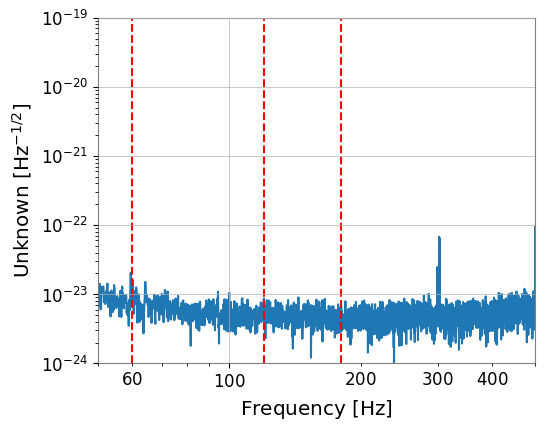

In [3]:
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd(fftlength=8).plot()
plt.xlim(50,500)
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")

In [4]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)


In [5]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

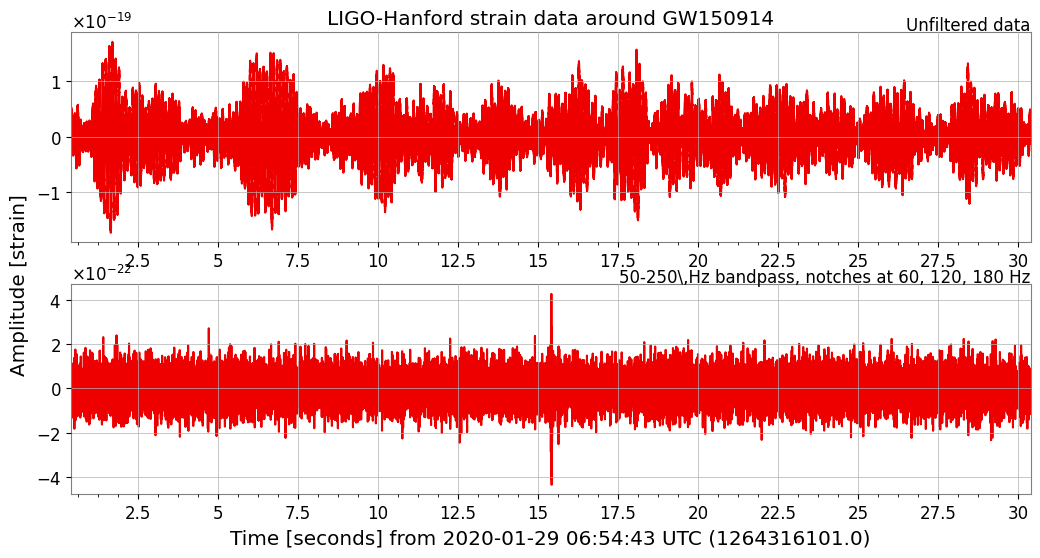

In [6]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW150914')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

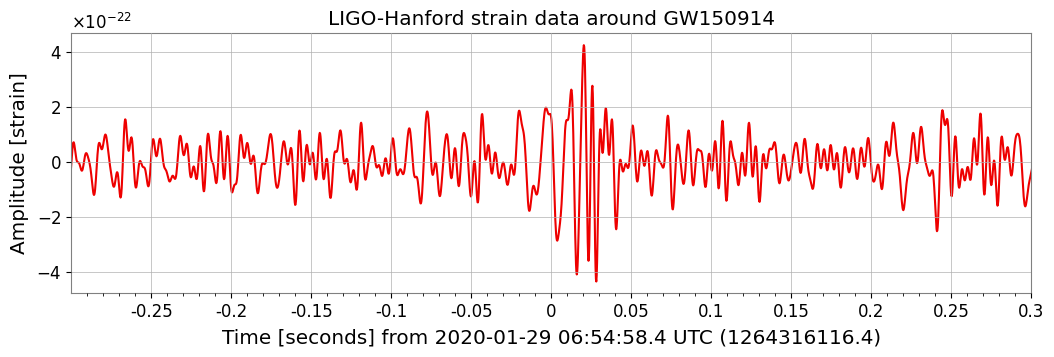

In [7]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW150914')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(t0 - 0.3, t0 + 0.3)
ax.set_xscale('seconds', epoch=t0)
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [8]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 16.0, t0 + 16.0)
lfilt = ldata.filter(zpk, filtfilt=True)

In [9]:
lfilt.shift('6.9ms')
lfilt *= -1

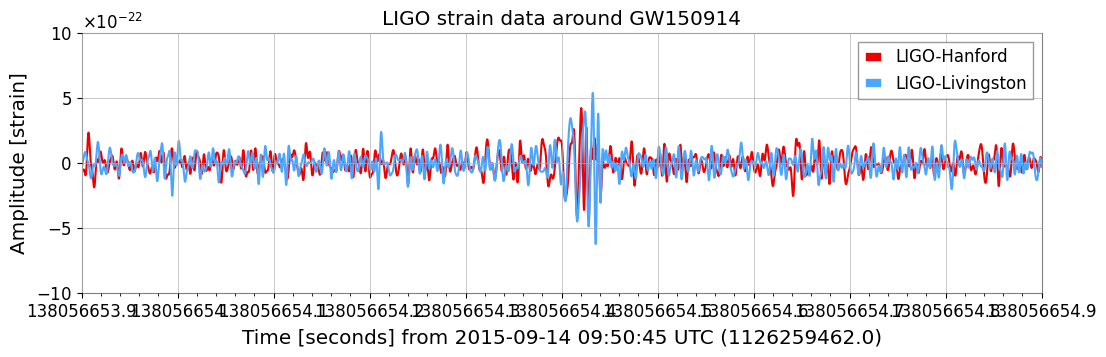

In [10]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW150914')
ax.set_xlim(t0 - 0.5, t0 + 0.5)
ax.set_xscale('seconds', epoch=1126259462)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

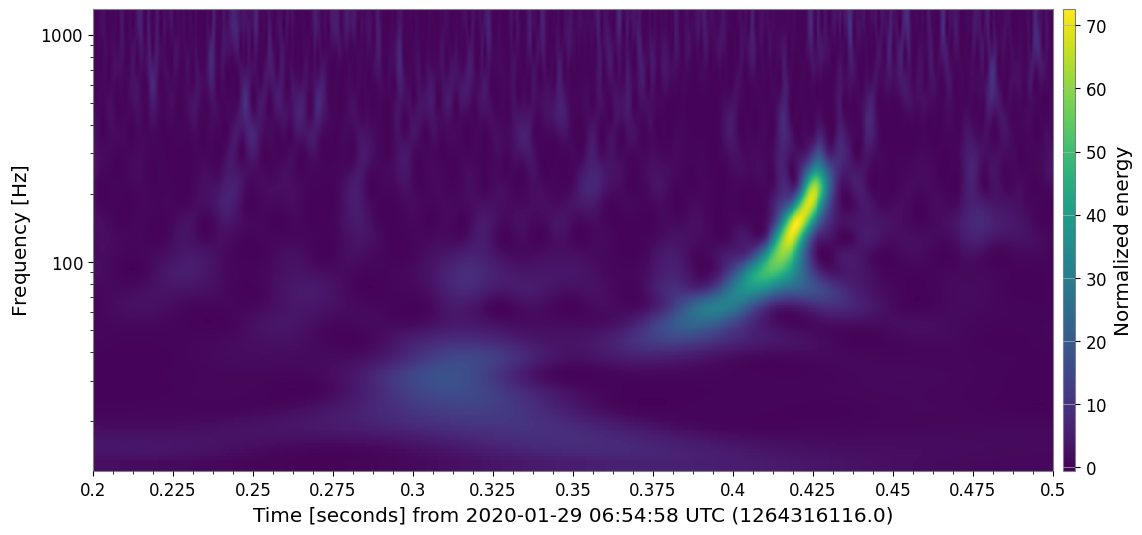

In [11]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [12]:
from scipy.io.wavfile import write
import numpy as np

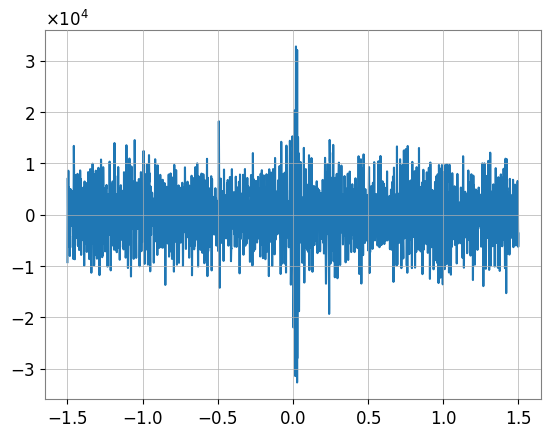

In [13]:
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))
y = y_val[ind]
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [14]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
print("fs = ", fs)
write("We Cooked.wav", fs, (np.array(y) * amplitude).astype(np.int16))

fs =  4096


In [15]:
from google.colab import files
files.download("We Cooked.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Beautify the GW sound

fs =  4096


<ipython-input-16-152777d2f453>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-16-152777d2f453>:55: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0 - t_clip / 2.0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
<ipython-input-16-152777d2f453>:62: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

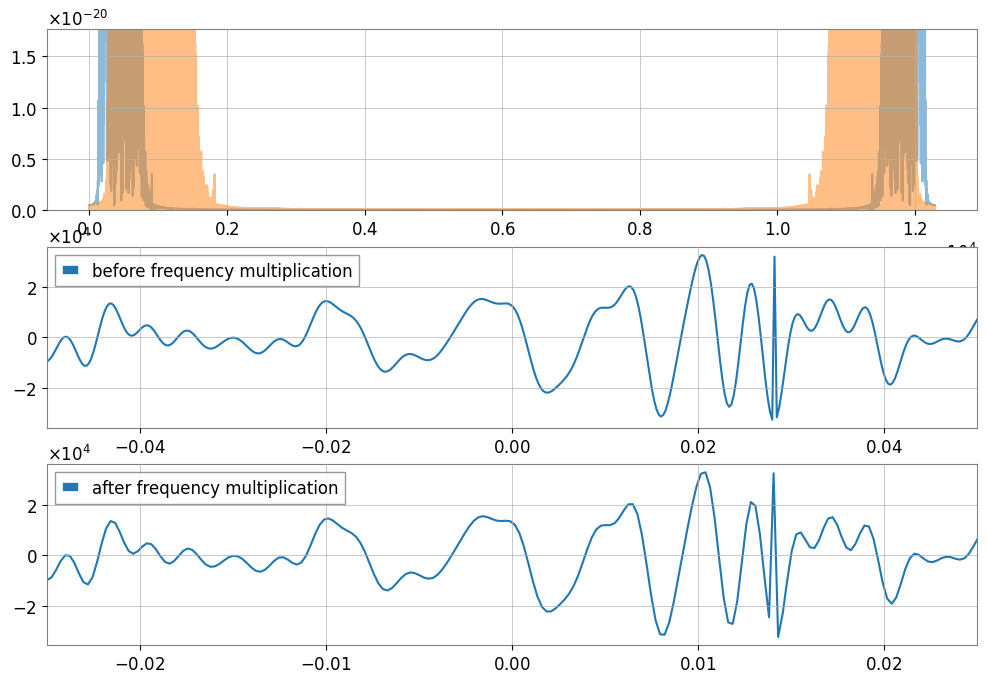

In [16]:
# Taking the graphs from above and finding the fourier graph and finding where it spikes
t_clip = 1.5
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip)))
x = x_val[ind]
y = y_val[ind]

# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="oringinal")
# print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))


y_fft = np.fft.fft(y)
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble)
y_fft_old = y_fft

num = len(y_fft)
for i in np.arange(num / 2):
    y_fft_new[int(i * 2)] = y_fft[int(i)]

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

# y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(np.abs(y_fft_old), alpha=0.5)
plt.plot(np.abs(y_fft_new), alpha=0.5)
ylim = np.percentile(np.abs(y_fft), 95)
plt.ylim(0, ylim)

# # up_sample = 1
# # x_new = np.linspace(np.min(x), np.max(x), len(x) * up_sample)
# # y_new = np.interp(x_new, x, y)

# # x = x_new
# # y = y_new
# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude).astype(np.int16), label="after up sampling")

plt.subplot(312)
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old)
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y)
plt.plot(x - t0 - t_clip / 2.0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-0.025, 0.025)
plt.legend()

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))

from google.colab import files
files.download("example.wav")

0.5
fs =  4096


<ipython-input-17-50804cfcd8d5>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-17-50804cfcd8d5>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
<ipython-input-17-50804cfcd8d5>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

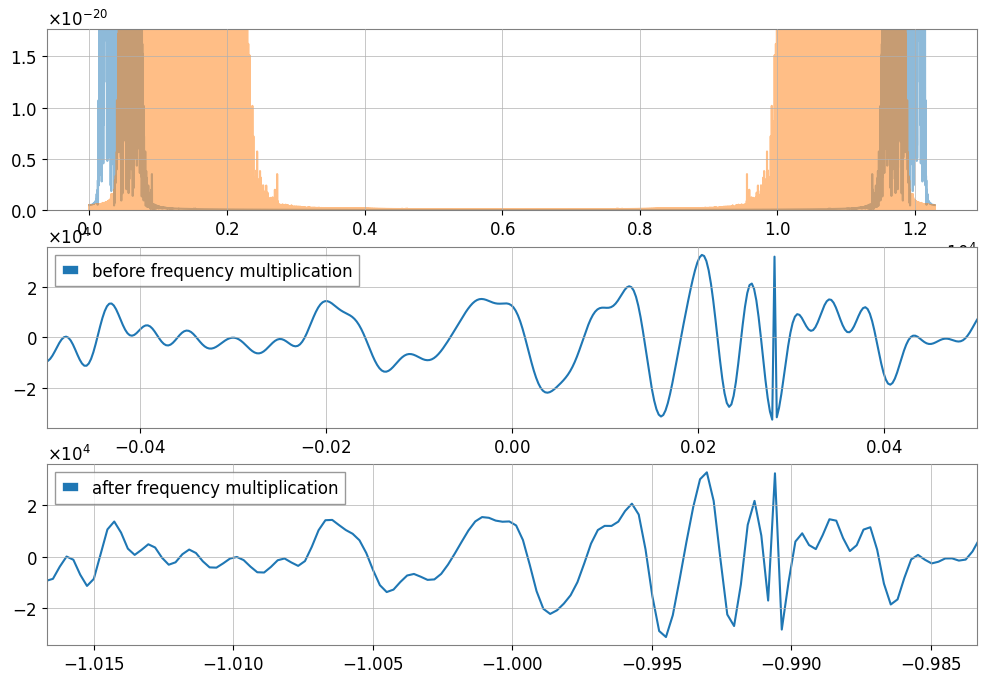

In [17]:
# Taking the previous graph and making it more specific so we can pick out the spkie more clearly
t_clip = 1.5
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip)))
x = x_val[ind]
y = y_val[ind]

# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="oringinal")
# print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))

up_sample = 3

y_fft = np.fft.fft(y)
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble)
y_fft_old = y_fft

num = len(y_fft)
for i in np.arange(int(num / up_sample)):
    y_fft_new[int(i * up_sample)] = y_fft[int(i)]

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

# y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(np.abs(y_fft_old), alpha=0.5)
plt.plot(np.abs(y_fft_new), alpha=0.5)
ylim = np.percentile(np.abs(y_fft), 95)
plt.ylim(0, ylim)

plt.subplot(312)
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old)
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y)
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-t_clip + t_clip / up_sample - 0.05 / up_sample, -t_clip + t_clip / up_sample + 0.05 / up_sample)
plt.legend()
print(t_clip / up_sample)

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))

from google.colab import files
files.download("example.wav")

In [18]:
print(y_fft[0:4], y_fft[-3:])
print(y_fft_new[0:10], y_fft_new[-3:])
print(y_fft_old[0:4], y_fft_old[-3:])


[5.24322649e-22+0.00000000e+00j 5.24348047e-22-1.80502472e-24j
 5.24424253e-22-3.61042849e-24j 5.24551302e-22-5.41659066e-24j] [5.24551302e-22+5.41659066e-24j 5.24424253e-22+3.61042849e-24j
 5.24348047e-22+1.80502472e-24j]
[5.24322649e-22+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 5.24348047e-22-1.80502472e-24j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 5.24424253e-22-3.61042849e-24j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 5.24551302e-22-5.41659066e-24j] [5.24348047e-22+1.80502472e-24j 0.00000000e+00-0.00000000e+00j
 0.00000000e+00-0.00000000e+00j]
[5.24322649e-22+0.00000000e+00j 5.24348047e-22-1.80502472e-24j
 5.24424253e-22-3.61042849e-24j 5.24551302e-22-5.41659066e-24j] [5.24551302e-22+5.41659066e-24j 5.24424253e-22+3.61042849e-24j
 5.24348047e-22+1.80502472e-24j]


Make C

(0.0, 0.1)

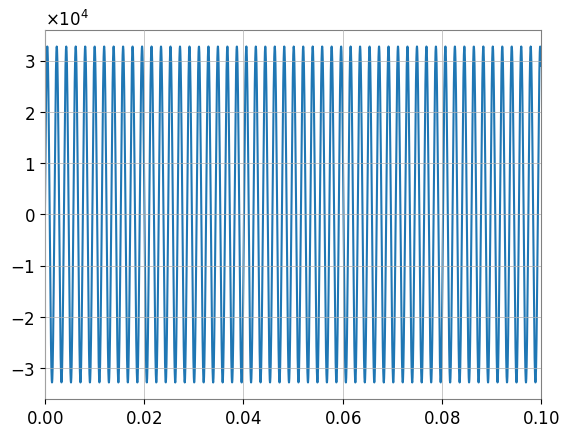

In [19]:
samplerate = 44100; fs = 261.63 * 2.0
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
plt.plot(t, data)
plt.xlim(0, 0.1)

In [20]:
write("C.wav", samplerate, data.astype(np.int16))
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>